# Andrew Ingrassia |  *Data Analysis Career Exploration*

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

df = pd.read_csv("bls_projections.csv")           # see "DF3 OVERVIEW" for description

***

### **PROJECT GOALS**


- Describe the circumstances that led me to pursue a career in data analysis


- Convey my suitability for a career in data analysis


- Demonstrate a basic understanding of data analysis tools, concepts, and techniques


- Practice my newly acquired data analysis skills by putting them to use in the context of a real-world project of personal significance


- Investigate the health of the data analysis and data science job markets using data from the US Bureau of Labor Statistics

***

### **BACKGROUND**

1) PERSONAL HISTORY

I attended Lindenwood University in St. Charles, MO and obtained a bachelor's degree in "Missions and Social Justice" (a subset of Lindenwood's "Christian Ministry Studies" program) in 2011. At the time I was also a medic in the Missouri Army National Guard and worked part-time for a family member as a house painter. I pursued that particular degree with the intention of going on to seminary and eventually entering full-time ministry, but those plans changed near the end of my time at Lindenwood due to a significant shift in worldview. That being the case, I was uncertain about how to proceed with life after graduation. Life carried on regardless of my uncertainty, and I got married, had two children, and started a residential painting business where I carved out a comfortable niche for myself specializing in high-end interior painting and cabinet refinishing. Painting was a great career that paid well enough and afforded me plenty of my beloved autonomy and independence, but I became increasingly unsatisfied as time went on. I didn't feel challenged, and in 2019 I started exploring other options.


2) WHY I CHOSE COMPUTER SCIENCE

I have always been interested in computers, but had not seriously considered a career in computer science until after undergoing a battery of personality and career aptitude tests. Every assessment tool that I used indicated strongly that I ought to consider a career in computer science. This is due not only to fact that computer science happens to align with my personal interests, but also to the fact that I possess certain temperamental qualities and behavioral tendencies common among those who find themselves pursuing computer science related careers.
    

Here are some relevant snippets from my personality test results:

- *Tendency to analyze systems and ideas thoroughly to create deep understanding*


- *Tendency to enjoy designing creative solutions to highly abstract problems*


- *Tendency to enjoy addressing complex theoretical or technical problems with creative, novel solutions*


- *Tendency to choose careers that allow them to use their intellect, analyze concepts, and think deeply*


- *Tendency to enjoy working with ideas more than with people (tech/engineering = good | sales/nursing = bad)*


- *Tendency to be fascinated with logical analysis, systems, and design*


- *Logical, analytical, insightful, curious, independent, and objective*


- *Innovative by nature and often drawn to cutting-edge fields such as technology, engineering, and the sciences*


3) WHY I AM SELF-TAUGHT

After a great deal of consideration, I decided to begin pursuing a second bachelor's degree in computer science. Because of the nature of my first degree, I had not yet completed the math courses required for application. I therefore began taking one math class at a time at my local community college until I fulfilled the requirements for application to Oregon State University's online post-baccalaureate computer science program, which I began in January of 2020. I had heard of "self-taught programmers" before, but by this point in time I was insufficiently familiar with the territory and never seriously considered taking that route. It wasn't until my second semester in OSU's program that I began to become acquainted with the vast expanse of readily available, high quality, and inexpensive (or in many instances completely free) computer science related educational resources. I came to the realization that even though it would mean forgoing a second degree, I could actually learn more effectively by teaching myself than I could by sticking with OSU's program. So after careful consideration, I decided to drop out of OSU in my second semester and began learning independently - a decision that I viewed as conveying the following advantages:
    
- *I could spend significantly less money and incur no additional student loan debt*


- *I could learn at my own pace*


- *I could learn exclusively from materials that I found to be more useful and effective compared to the OSU curriculum*


- *I could focus more precisely on developing job-specific skills*


- *I could be job-ready in less time*


- *I could have a more flexible schedule while I learned, freeing me up to watch my kids when needed (to save on daycare costs) as well as to pick up side work as a painter*
    

4) WHY I CHOSE DATA ANALYSIS

I have felt drawn toward data science ever since I began thinking about switching careers. It strikes me as a field that is tailor-made for people with my temperament. I initially assumed that pursuing data science in any form was off the table because doing so would entail taking so many prerequisite math courses that I wouldn't be able to obtain a degree in a reasonable ammount of time. But I eventually came to understand that under the umbrella of “data science” exists a wide spectrum of responsibilities and associated educational requirements. I was thrilled to learn that a career in data analysis was actually a practical, achievable goal. Since then I have enjoyed learning to work with large datasets using Python in conjunction with tools like Pandas, Matplotlib, and Jupyter Notebooks. I feel as though I have found a niche into which my talents, personality, and interests fit perfectly, and I am excited to begin putting my newly acquired skills to work in the real world.

***

**NOTE:** What follows is my analysis of a dataset from the US Bureau of Labor Statistics with the goal of understanding the state of the data science and data analysis job markets...

***

### **DATA OVERVIEW**: "Bureau of Labor Statistics - Occupational Projections Data"


*Dataset Link*: https://data.bls.gov/projections/occupationProj | *Full Dataset Explanation*: https://www.bls.gov/emp/documentation/nem-definitions.htm


This dataset comes from the US Bureau of Labor Statistics and presents occupational data related to:

- *Historical and projected employment by occupation (2019 - 2029)*


- *Projections of separations from occupations that will result in openings for new workers (2019 - 2029)*


- *Typical education, experience, and training requirements for each occupation*


- *Average annual occupational openings (2019 - 2029)*


- *Median annual wages (as of 2020)*

***

### **UNDERSTANDING THE JOB MARKETS**

1) ORGANIZING THE DATA

In [6]:
# Creates a new df containing only data from df3 that is directly related to the question
df_growth = df[["Occupation Title", 
                "Employment 2019", "Employment 2029", 
                "Employment Percent Change, 2019-2029", 
                "Occupational Openings, 2019-2029 Annual Average"]]

# Sorts the new df according to projected % employment growth from 2019 - 2029 (top 20 only)
df_growth = df_growth.sort_values("Employment Percent Change, 2019-2029", ascending = False).head(20)

# Renames the new df columns for clarity
df_growth = df_growth.rename(columns = {"Occupation Title": "Occupation", 
                                        "Employment 2019": "2019", 
                                        "Employment 2029": "2029", 
                                        "Employment Percent Change, 2019-2029": "Growth", 
                                        "Occupational Openings, 2019-2029 Annual Average": "Openings"})

# Assigns new index values representing each associated occupation's rank (according to projected employment growth)
rank = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
df_growth["Rank"] = rank
df_growth.set_index("Rank", inplace = True)


# Adds a "Code" column containing letters that each represent the associated occupation (wind turbine service tech = "A", etc.)
occupation_codes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"]
df_growth["Code"] = occupation_codes

***

2) VIEWING THE MODIFIED DATAFRAME

In [7]:
df_growth   # modified version of the original "df" dataframe

,Occupation,2019,2029,Growth,Openings,Code
Rank,,,,,,
1,Wind turbine service technicians * Wind Ene...,7.0,11.3,60.7,1.3,A
2,Nurse practitioners * Acute Care Nurse Prac...,211.3,322.0,52.4,24.2,B
3,Solar photovoltaic installers * PV Installe...,12.0,18.1,50.5,2.3,C
4,Statisticians * Analytical Statistician* Ap...,42.7,57.5,34.6,4.9,D
5,Occupational therapy assistants * COTA* Cer...,47.1,63.5,34.6,6.9,E
6,Home health and personal care aides,"3,439.7","4,599.2",33.7,568.8,F
7,Physical therapist assistants * LPTA* Licen...,98.7,130.9,32.6,15.1,G
8,Medical and health services managers * Clin...,422.3,555.5,31.5,47.0,H
9,Physician assistants * Anesthesiologist Ass...,125.5,164.8,31.3,11.4,I


***

3) DATA OVERVIEW

- According to the US Bureau of Labor Statistics, these 20 occupations (out of the 790 from the original dataset) are projected to experience the highest percentages of employment growth between 2019 and 2029.


- Notice that a high projected employment growth rate doesn't necessarily translate to a large number of annual openings given that some industries are smaller than others. For example, the projected 60.7% increase in wind turbine maintenance related employment growth ("A") represents only 1,300 annual openings, whereas the projected 22.9% increase in service unit operation related employment growth ("T") represents 8,100 annual openings.

***

4) COLUMN EXPLANATIONS

- **Rank** - each occupation's rank according to the associated value within the the "Growth" column


- **Occupation** - occupation titles


- **2019** - employment (in thousands) within the associated occupation in 2019


- **2029** - projected employment (in thousands) within the associated occupation by 2029


- **Growth** - projected percent increase in employment within the associated occupation by 2029


- **Openings** - projected annual average number (in thousands) of openings/positions for workers entering the associated occupation between 2019 and 2029


- **Code** - each occupation title is assigned a letter that will represent that occupation within my visualization

***

5) VISUALIZING THE DATA: "PROJECTED EMPLOYMENT GROWTH 2019 - 2029"

- The following plot represents the projected percentage of employment growth for each of the occupational categories listed in the "df_growth" dataframe


- The bars representing the data science and data analysis related occupational categories are labeled on the plot itself - for the full list of categories and their associated letter codes, see the "df_growth" dataframe from "VIEWING THE MODIFIED DATAFRAME"

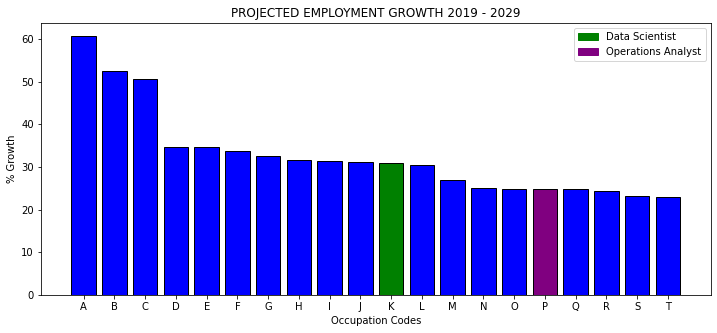

In [8]:
# Creates the plot, sets the x and y axes, and determines the aesthetic characteristics of the bars
plt.bar(df_growth["Code"], 
        df_growth["Growth"], 
        color = ["b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "green", "b", "b", "b", "b", "purple", "b", "b", "b", "b"], 
        edgecolor = "black")

# Adds a label to the x axis
plt.xlabel("Occupation Codes")

# Adds a label to the y axis
plt.ylabel("% Growth")

# Adds a title to the plot
plt.title("PROJECTED EMPLOYMENT GROWTH 2019 - 2029")

# Customizes the plot dimensions
plt.rcParams["figure.figsize"] = [12, 5]

# Adds a custom legend to the plot
data_science = mpatches.Patch(color = "green", label = "Data Scientist")
data_analysis = mpatches.Patch(color = "purple", label = "Operations Analyst")
plt.legend(handles = [data_science, data_analysis])

***

6) ANALYSIS

- The goal of this section is to answer the question: "How healthy is the data science job market?".

- The data I pulled from the US Bureau of Labor Statistics (the principal fact-finding agency for the U.S. government in the broad field of labor economics and statistics) indicates that the data science and data analysis (aka "operations analysis") job markets are not only healthy, but that they are **projected to remain among the healthiest in the country between now and 2029**. 


- Out of the 790 occupational categories included in this study, data science and data analysis related occupations ranked number 11 and number 16 respectively in terms of their percentage of projected employment growth in the US over the next 8 years.


- This comes as no surprise given the primacy of "big data" in today's world, but it has certainly been instructive to look the data myself.

***

### **CONCLUSION**

1) I feel confident in my ability to succeed as a data analyst - I possess the intellectual capacity, temperamental suitability, interest level, and self-generated drive. I don't tend to make decisions lightly and I pride myself on my ability to remain objective. That being said, I wouldn't have come this far if I wasn't absolutely convinced that it was the right decision.

2) Personal suitability and motivation aside, it also happens to be the case that individuals possessing skills related to data science and data analysis are in high demand right now - and that demand is projected to continue for quite some time. 

3) I don't think I could have chosen a better career path for myself, and I'm determined to make it happen this year.